# Importing Libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from wordcloud import WordCloud
import nltk 
import re
import joblib
from textblob import TextBlob

In [172]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

**Loading the dataset**

In [173]:
data = pd.read_csv('C:\\Users\\Madhumitha\\Desktop\\Sarah Job\\Github Projects\\Climate Change Modeling\\climate_nasa.csv')

**Checking rows and columns**

In [174]:
data.shape

(522, 5)

**Checking data types**

In [175]:
data.dtypes

date              object
likesCount         int64
profileName       object
commentsCount    float64
text              object
dtype: object

# Exploring the dataset

**Displaying first 5 rows**

In [176]:
data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


**Summary of numerical columns**

In [177]:
data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


# Data Preprocessing

In [178]:
data['temperature'] = 16.5  
data['CO2 level'] = 420.0
data['precipitation'] = 1.2
data['sea level'] = 2.5

In [179]:
print(data.columns.tolist())

['date', 'likesCount', 'profileName', 'commentsCount', 'text', 'temperature', 'CO2 level', 'precipitation', 'sea level']


**Checking Data Information**

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
 5   temperature    522 non-null    float64
 6   CO2 level      522 non-null    float64
 7   precipitation  522 non-null    float64
 8   sea level      522 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 36.8+ KB


**Handle Missing Text**

In [181]:
data['text'] = data['text'].fillna('No Comment')

**Checking for missing values**

In [182]:
data.isnull().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text               0
temperature        0
CO2 level          0
precipitation      0
sea level          0
dtype: int64

# Exploratory Data Analysis (EDA)

**Likes Count Distribution**

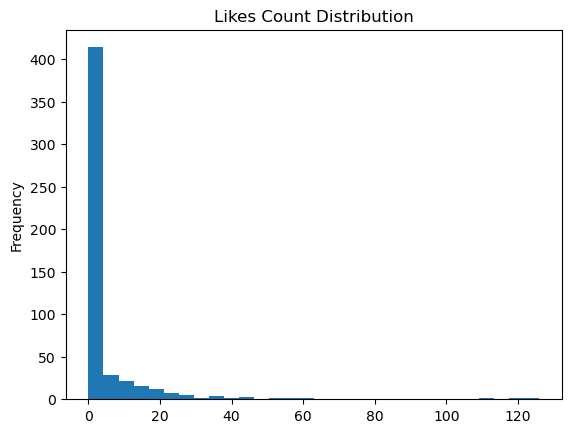

In [183]:
data['likesCount'].plot(kind='hist', bins=30, title='Likes Count Distribution')
plt.show()

**Comments Count Distribution**

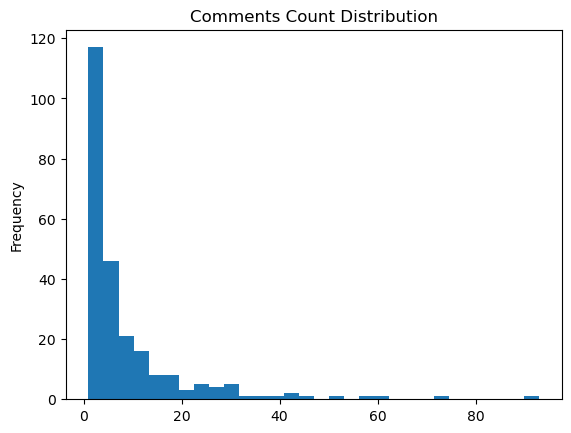

In [101]:
data['commentsCount'].plot(kind='hist', bins=30, title='Comments Count Distribution')
plt.show()

**Scatter Plot(Likes vs Comments)**

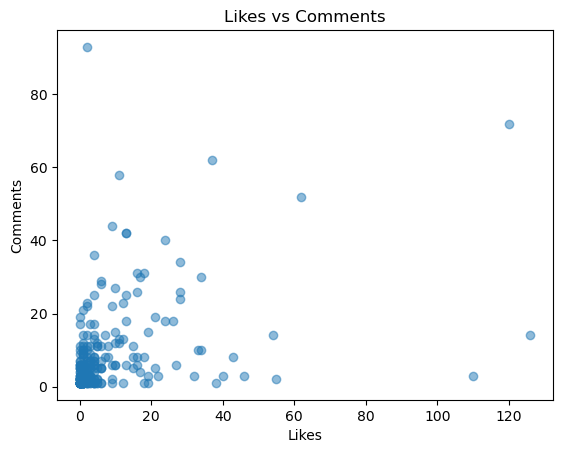

In [102]:
plt.scatter(data['likesCount'], data['commentsCount'], alpha=0.5)
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.title('Likes vs Comments')
plt.show()

**Heatmap Correlation**

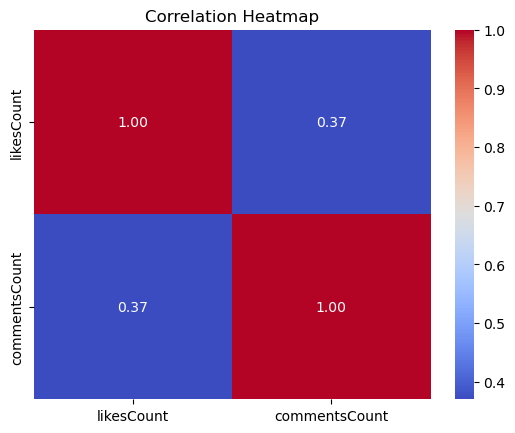

In [103]:
correlation_matrix = data[['likesCount', 'commentsCount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Top Commenters**

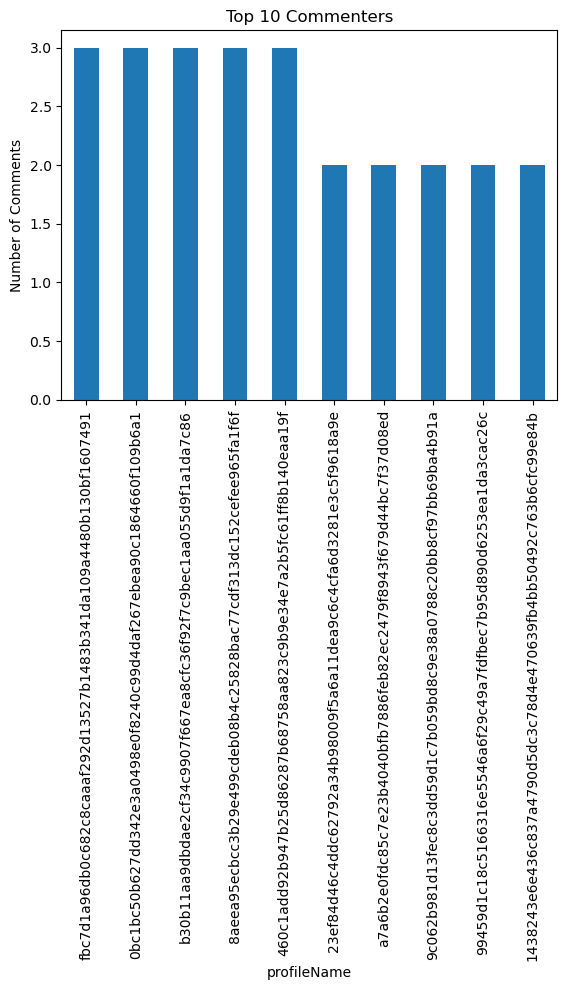

In [104]:
top_commenters = data['profileName'].value_counts().head(10)
top_commenters.plot(kind='bar', title='Top 10 Commenters')
plt.ylabel('Number of Comments')
plt.show()

**Time Trend Analysis**

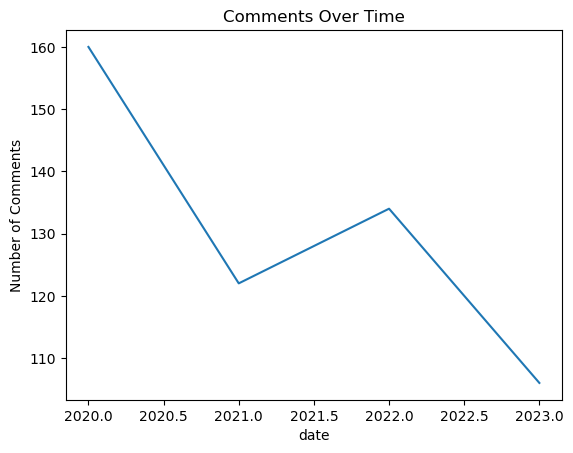

In [184]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Make sure to handle errors gracefully

data.groupby(data['date'].dt.year).size().plot(kind='line', title='Comments Over Time')
plt.ylabel('Number of Comments')
plt.show()

**Word Cloud**

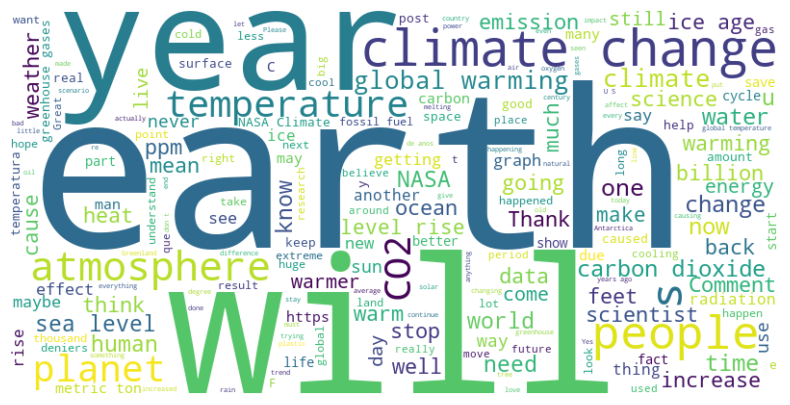

In [185]:
data['text'] = data['text'].fillna('').astype(str)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Engineering

In [186]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = " ".join([word.lower() for word in text.split() if word.lower() not in stop])
    return text

data['clean_text'] = data['text'].apply(clean_text)

In [187]:
data['text'] = data['text'].apply(lambda x: '' if pd.isnull(x) else str(x))
data['WordCount'] = data['text'].apply(lambda x: len(str(x).split()))
print(data[['text', 'WordCount']].head())

                                                text  WordCount
0  Neat comparison I have not heard it before.\n ...         32
1  An excellent way to visualise the invisible! T...          8
2  Does the CO2/ghg in the troposphere affect the...         16
3  excellent post! I defo feel the difference - o...         19
4  Yes, and carbon dioxide does not harm the Eart...         24


# Sentiment Analysis

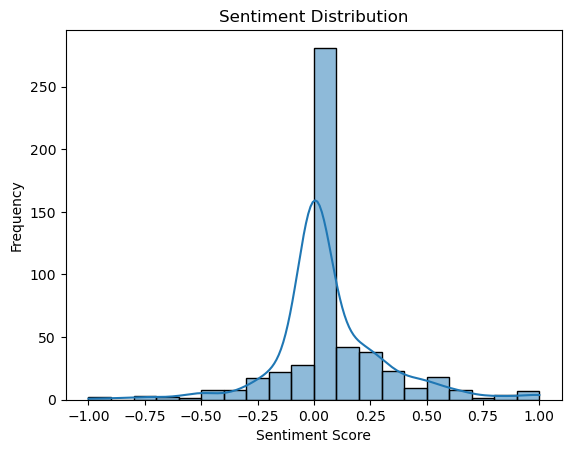

In [188]:
# Create a new column for sentiment polarity (score from -1 to 1)
data['sentiment_score'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(data['sentiment_score'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**Distribution of Sentiment Score**

In [189]:
def label_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_label'] = data['sentiment_score'].apply(label_sentiment)

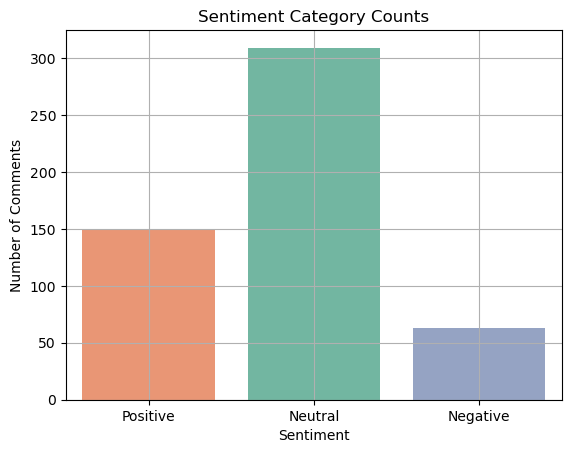

In [190]:
sns.countplot(x='sentiment_label', data=data, hue='sentiment_label', palette='Set2', order=['Positive', 'Neutral', 'Negative'], legend=False)
plt.title('Sentiment Category Counts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.show()

**Comment Length Distribution**

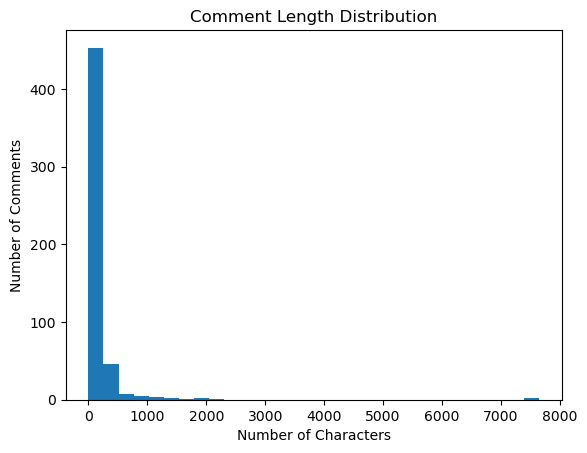

In [191]:
data['TextLength'] = data['text'].apply(len)

data['TextLength'].plot(kind='hist', bins=30, title='Comment Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Comments')
plt.show()

In [192]:
data.isnull().sum()

date                 0
likesCount           0
profileName          0
commentsCount      278
text                 0
temperature          0
CO2 level            0
precipitation        0
sea level            0
clean_text           0
WordCount            0
sentiment_score      0
sentiment_label      0
TextLength           0
dtype: int64

In [193]:
data=data.dropna()

# Outlier Detection and Handling

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3fbe2f200>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3fbe2f680>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3fbe2edb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3fbe2fd40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3fbe2c6b0>],
 'means': []}

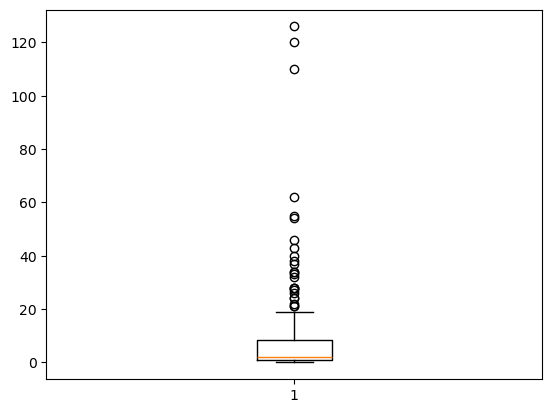

In [194]:
plt.boxplot(data['likesCount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3fb0e69c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3fb0bbe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3fb0e6b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3f94b5850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3f1a555e0>],
 'means': []}

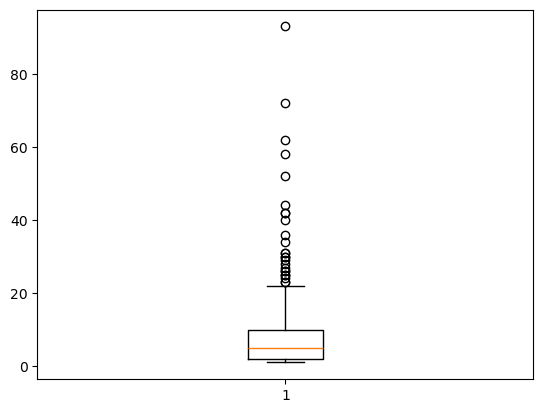

In [195]:
plt.boxplot(data['commentsCount'])

**Replacing of outliers**

In [196]:
def ro(d, c):
    d[c] = d[c].astype(float)  # Ensure float type to avoid dtype warnings

    q1 = np.quantile(d[c], 0.25)
    q3 = np.quantile(d[c], 0.75)
    iqr = q3 - q1
    lb = q1 - (1.5 * iqr)
    ub = q3 + (1.5 * iqr)

    d.loc[d[c] > ub, c] = ub
    d.loc[d[c] < lb, c] = lb

    return d

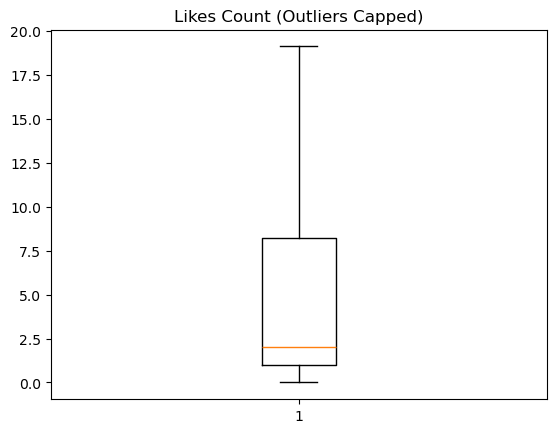

In [197]:
data = ro(data, 'likesCount')
plt.boxplot(data['likesCount'])
plt.title('Likes Count (Outliers Capped)')
plt.show()

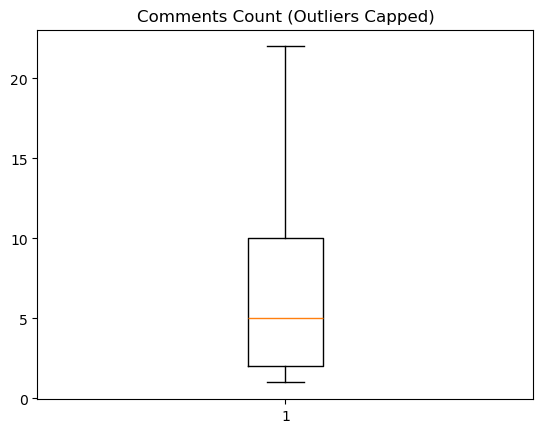

In [198]:
data = ro(data, 'commentsCount')
plt.boxplot(data['commentsCount'])
plt.title('Comments Count (Outliers Capped)')
plt.show()

# Model Training

**Select Relevant Features**

In [199]:
features = ['likesCount', 'commentsCount', 'TextLength', 'WordCount', 'temperature', 'CO2 level', 'precipitation', 'sea level']
target = 'sentiment_score'

X = data[features]
y = data[target]

**Train-Test Split**

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(195, 8) (49, 8)
(195,) (49,)


**Scale the features**

In [202]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Initialize Model**

In [203]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

**Train the Model**

In [204]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [128]:
y_pred = model.predict(X_test_scaled)

In [130]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [131]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 0.15818380149489344
MSE: 0.05518195913647419
R-squared: -0.18319340226472347


**Perform Cross-validation**

In [132]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {-cv_scores.mean()}")

Cross-validation scores: 0.05876779953074944


**Hyperparameter Tuning**

In [133]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# Feature Importance

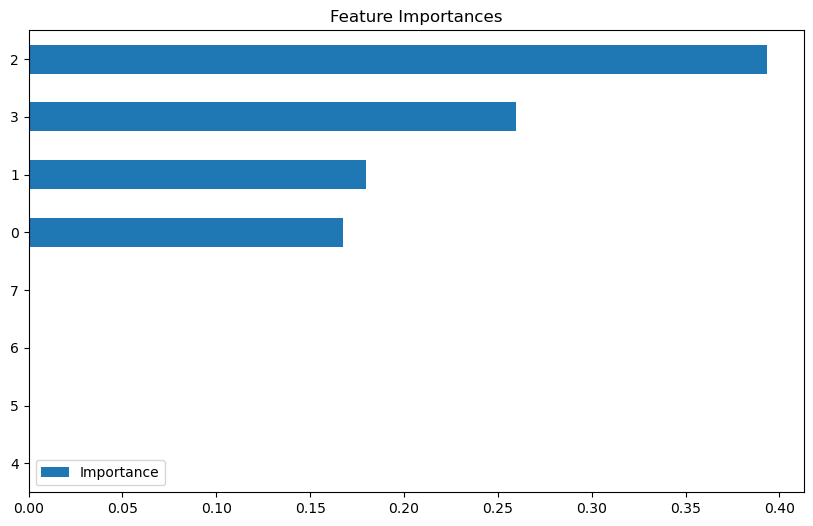

In [134]:
importances = model.feature_importances_
pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance').plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances"); plt.show()

# Confusion Matrix

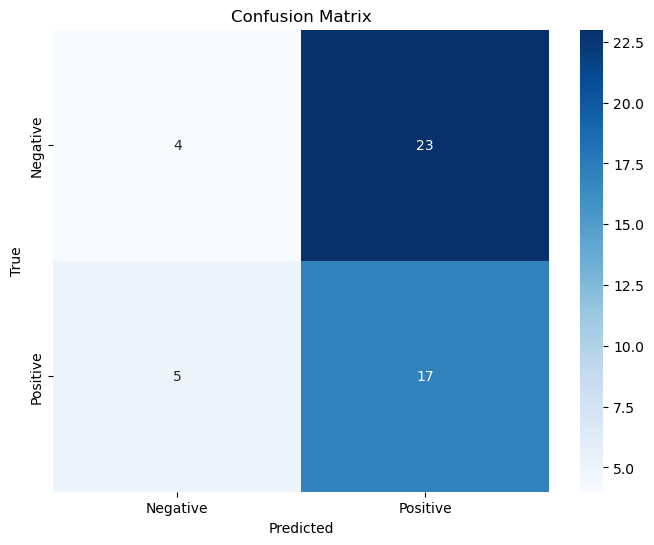

In [135]:
from sklearn.metrics import confusion_matrix

threshold = 0
y_pred_class = (y_pred > threshold).astype(int)  # Convert to 0/1 based on threshold
y_test_class = (y_test > threshold).astype(int)  # Similarly for true values

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Actual vs Predicted Temperature Anomaly

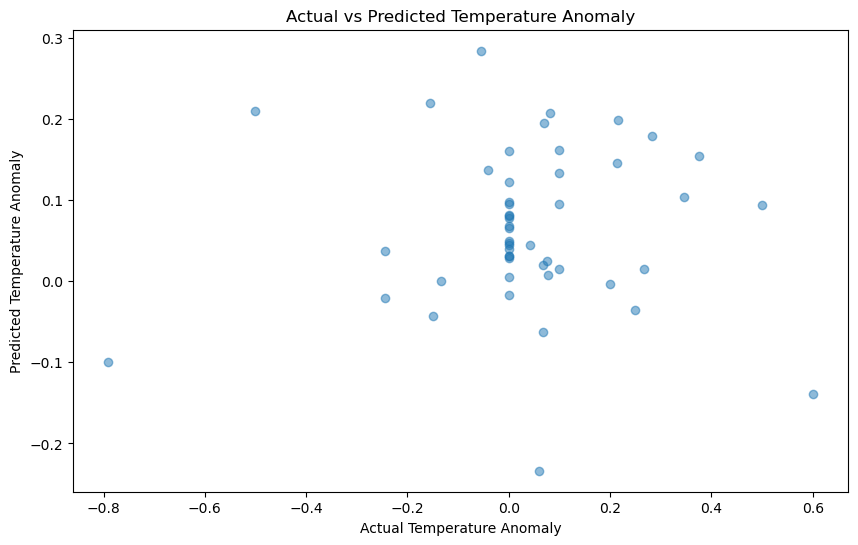

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature Anomaly')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Actual vs Predicted Temperature Anomaly')
plt.show()

# Model Deployment

**Save the Best Model & Scaler**

In [137]:
joblib.dump(model, 'climate_change_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the StandardScaler used for training

print("model and scaler saved successfully")

model and scaler saved successfully


**Future Projections**

In [ ]:
# Load model and predict new scenario
loaded_model = joblib.load('climate_change_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Scenario Analysis

In [146]:
base_likes = 60
base_comments = 15
base_text_length = 220
base_word_count = 45

scenarios = pd.DataFrame([
    [base_likes - 20, base_comments - 5, base_text_length - 30, base_word_count - 10, 14.0, 310.0, 0.8, 1.2],
    [base_likes, base_comments, base_text_length, base_word_count, 16.5, 420.0, 1.2, 2.5],
    [base_likes + 30, base_comments + 10, base_text_length + 50, base_word_count + 15, 19.0, 550.0, 2.5, 4.0]
], columns=features)

scenarios_scaled = loaded_scaler.transform(scenarios)
preds = loaded_model.predict(scenarios_scaled)
labels = ['Low Emission', 'Medium Emission', 'High Emission']

for i, score in enumerate(preds):
    print(f"{labels[i]} Scenario - Predicted Sentiment Score: {score:.4f}")

Low Emission Scenario - Predicted Sentiment Score: -0.0459
Medium Emission Scenario - Predicted Sentiment Score: -0.0921
High Emission Scenario - Predicted Sentiment Score: 0.0815


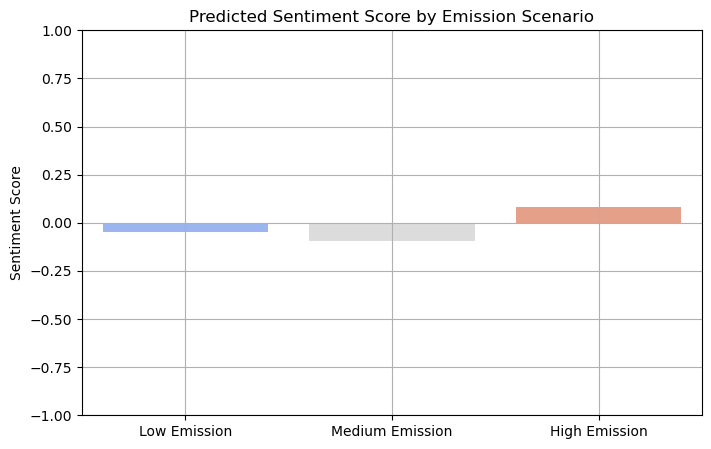

In [148]:
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=preds, hue=labels, palette='coolwarm', dodge=False, legend=False)
plt.title('Predicted Sentiment Score by Emission Scenario')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

# Sentiment Encoding & Data Splitting

In [139]:
data['sentiment_class'] = data['sentiment_label'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
X_cls = data[features]
y_cls = data['sentiment_class']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Model Classification

In [140]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls_scaled, y_train_cls)
y_pred_cls = clf.predict(X_test_cls_scaled)
print(classification_report(y_test_cls, y_pred_cls, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.60      0.43      0.50         7
     Neutral       0.71      0.75      0.73        32
    Positive       0.30      0.30      0.30        10

    accuracy                           0.61        49
   macro avg       0.54      0.49      0.51        49
weighted avg       0.61      0.61      0.61        49

